In [1]:
pip install fanalysis

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from fanalysis.mca import MCA

In [3]:
df = pd.read_csv("clean_df.csv")
df.head()

,Title,Type,Start airing,Studios,Genres,Rating,Score,Scored by,Members,Favorites,Niveau,Movie,Music,ONA,OVA,Special,TV
0,Fullmetal Alchemist: Brotherhood,TV,2009,Bones,"Action,Military,Adventure,Comedy,Drama,Magic,F...",R,9.25,719706,1176368,105387,Excellent,0,0,0,0,0,1
1,Kimi no Na wa.,Movie,2016,CoMix Wave Films,"Supernatural,Drama,Romance,School",PG-13,9.19,454969,705186,33936,Excellent,1,0,0,0,0,0
2,Gintama°,TV,2015,Bandai Namco Pictures,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",R,9.16,70279,194359,5597,Excellent,0,0,0,0,0,1
3,Steins;Gate 0,TV,2018,White Fox,"Sci-Fi,Thriller",PG-13,9.16,12609,186331,1117,Excellent,0,0,0,0,0,1
4,Steins;Gate,TV,2011,White Fox,"Sci-Fi,Thriller",PG-13,9.14,552791,990419,90365,Excellent,0,0,0,0,0,1


In [4]:
df[["Niveau","Type","Rating"]]=df[["Niveau","Type","Rating"]].astype("string")
X=df[["Niveau","Type","Rating"]]
print(X.dtypes)
X=X.values

Niveau    string
Type      string
Rating    string
dtype: object


In [5]:
my_mca = MCA(row_labels=df.index, var_labels=["Niveau","Type","Rating"])
my_mca.fit(X)

MCA(n_components=None, row_labels=RangeIndex(start=0, stop=1505, step=1),
  stats=True, var_labels=['Niveau', 'Type', 'Rating'])

In [6]:
print(my_mca.eig_)

[[  0.42115661   0.38393358   0.37683814   0.34862077   0.34129857
    0.32443602   0.32047766   0.31820082   0.29547559   0.29152838
    0.24470053]
 [ 11.4860894   10.47091591  10.27740379   9.50783905   9.30814269
    8.84825519   8.74029969   8.67820425   8.0584252    7.9507739
    6.67365092]
 [ 11.4860894   21.95700531  32.2344091   41.74224815  51.05039084
   59.89864603  68.63894572  77.31714997  85.37557517  93.32634908
  100.        ]]


In [7]:
print(my_mca.eig_)

[[  0.42115661   0.38393358   0.37683814   0.34862077   0.34129857
    0.32443602   0.32047766   0.31820082   0.29547559   0.29152838
    0.24470053]
 [ 11.4860894   10.47091591  10.27740379   9.50783905   9.30814269
    8.84825519   8.74029969   8.67820425   8.0584252    7.9507739
    6.67365092]
 [ 11.4860894   21.95700531  32.2344091   41.74224815  51.05039084
   59.89864603  68.63894572  77.31714997  85.37557517  93.32634908
  100.        ]]


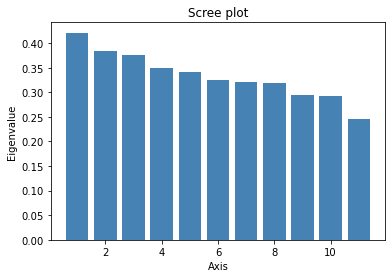

In [8]:
my_mca.plot_eigenvalues()

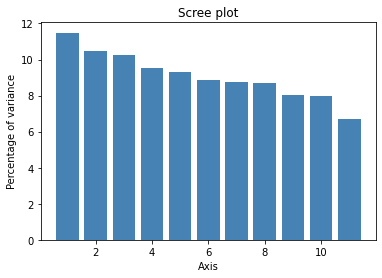

In [9]:
my_mca.plot_eigenvalues(type="percentage")

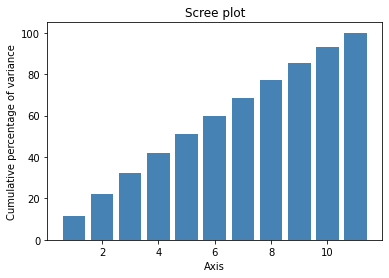

In [10]:
my_mca.plot_eigenvalues(type="cumulative")

In [11]:
df_rows = my_mca.row_topandas()
print(df_rows)

      row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
0           0.685273       -1.660832       -1.551851        1.063325   
1           0.051907       -0.858167       -1.521454        0.299564   
2           0.685273       -1.660832       -1.551851        1.063325   
3           0.657930       -1.272451       -1.090196        0.756809   
4           0.657930       -1.272451       -1.090196        0.756809   
...              ...             ...             ...             ...   
1500        0.205378       -0.377786       -0.353294        0.427165   
1501        0.378253        0.621279        0.550125       -0.171612   
1502       -0.427989        0.424880       -0.322897       -0.336597   
1503       -0.427989        0.424880       -0.322897       -0.336597   
1504        0.205378       -0.377786       -0.353294        0.427165   

      row_coord_dim5  row_coord_dim6  row_coord_dim7  row_coord_dim8  \
0          -0.056807       -0.454325        1.435263       -0.9

In [12]:
# Coordonnées des points lignes
print(my_mca.row_coord_)

[[ 0.68527318 -1.66083241 -1.55185141 ... -0.21755104 -1.00594748
  -0.46007616]
 [ 0.05190661 -0.85816692 -1.52145447 ... -1.19507334 -1.10484422
  -0.02389956]
 [ 0.68527318 -1.66083241 -1.55185141 ... -0.21755104 -1.00594748
  -0.46007616]
 ...
 [-0.42798902  0.42487967 -0.32289714 ... -0.64969934  0.18087263
   0.63776733]
 [-0.42798902  0.42487967 -0.32289714 ... -0.64969934  0.18087263
   0.63776733]
 [ 0.20537755 -0.37778581 -0.35329408 ...  0.32782296  0.27976938
   0.20159074]]


In [13]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[7.40879100e-02 4.77374284e-01 4.24628288e-01 ... 1.06430039e-02
  2.30639283e-01 5.74761999e-02]
 [4.25074675e-04 1.27453257e-01 4.08156364e-01 ... 3.21167067e-01
  2.78217706e-01 1.55098831e-04]
 [7.40879100e-02 4.77374284e-01 4.24628288e-01 ... 1.06430039e-02
  2.30639283e-01 5.74761999e-02]
 ...
 [2.88991540e-02 3.12420346e-02 1.83838741e-02 ... 9.49219705e-02
  7.45638606e-03 1.10446797e-01]
 [2.88991540e-02 3.12420346e-02 1.83838741e-02 ... 9.49219705e-02
  7.45638606e-03 1.10446797e-01]
 [6.65465896e-03 2.47000986e-02 2.20080399e-02 ... 2.41668816e-02
  1.78395140e-02 1.10349336e-02]]


In [14]:
# Cos2 des points lignes
print(my_mca.row_cos2_)

[[4.17416529e-02 2.45184944e-01 2.14063415e-01 ... 4.20692245e-03
  8.99482649e-02 1.88148881e-02]
 [2.42735600e-04 6.63485848e-02 2.08548007e-01 ... 1.28669981e-01
  1.09974051e-01 5.14597964e-05]
 [4.17416529e-02 2.45184944e-01 2.14063415e-01 ... 4.20692245e-03
  8.99482649e-02 1.88148881e-02]
 ...
 [1.19786545e-01 1.18052367e-01 6.81822259e-02 ... 2.76037219e-01
  2.13938284e-02 2.65991238e-01]
 [1.19786545e-01 1.18052367e-01 6.81822259e-02 ... 2.76037219e-01
  2.13938284e-02 2.65991238e-01]
 [2.51131427e-02 8.49740714e-02 7.43135232e-02 ... 6.39843645e-02
  4.66010272e-02 2.41955936e-02]]


In [15]:
df_cols = my_mca.col_topandas()
print(df_cols)

                  col_coord_dim1  col_coord_dim2  col_coord_dim3  \
Niveau_Bon              0.431964       -0.761291        0.294119   
Niveau_Excellent        0.751791       -2.030795       -2.206182   
Niveau_Mediocre        -0.182517        0.354224        0.001099   
Type_Movie             -0.918581        0.254704       -0.851123   
Type_Music             -7.002931       -3.360335        5.215733   
Type_ONA                0.221119        2.554958       -0.422898   
Type_OVA                0.651090        0.619784        0.756648   
Type_Special            0.137241        1.183664        1.021529   
Type_TV                 0.261285       -0.515397       -0.056911   
Rating_G               -2.389651       -0.844234        0.717126   
Rating_None            -2.768140        1.824515       -4.710924   
Rating_PG              -0.979647        1.393611       -2.204451   
Rating_PG-13            0.267847        0.180869        0.255372   
Rating_R                0.321081       -0.541082

In [16]:
# Coordonnées des points colonnes
print(my_mca.col_coord_)

[[ 4.31963724e-01 -7.61290532e-01  2.94118644e-01 -6.84492428e-01
   3.11184962e-01  3.11666433e-01 -7.02082079e-01  6.49732738e-01
  -2.54444216e-01 -6.96504701e-01 -2.76600071e-01]
 [ 7.51790872e-01 -2.03079468e+00 -2.20618157e+00  1.30109979e+00
   4.73683679e-01 -9.64473766e-01  3.44511966e+00 -6.41733734e-01
  -7.66900335e-01 -1.76291103e+00 -8.48137208e-01]
 [-1.82516684e-01  3.54223728e-01  1.09876526e-03  1.74254337e-01
  -1.28352218e-01 -6.21813270e-02  8.13805059e-02 -1.92771364e-01
   1.22457399e-01  3.19694461e-01  1.33787349e-01]
 [-9.18581390e-01  2.54703501e-01 -8.51122616e-01 -6.23557554e-01
  -5.86829218e-02 -2.74120244e-01 -1.27916762e-01  2.02970557e-01
  -1.08736314e+00 -1.02085345e-01  5.93548877e-01]
 [-7.00293117e+00 -3.36033461e+00  5.21573312e+00  2.55482970e+00
  -1.35769222e+00  4.85637959e-01  1.39288542e+00  6.57251960e-01
   3.66954987e+00 -5.36256556e+00  5.04819906e+00]
 [ 2.21118894e-01  2.55495790e+00 -4.22898361e-01  3.59159150e+00
  -1.29619083e+00  

In [17]:
# Contributions des points colonnes
print(my_mca.col_contrib_)

[[3.64055071e+00 1.24039758e+01 1.88628111e+00 1.10433338e+01
  2.33141129e+00 2.46018149e+00 1.26384605e+01 1.09014522e+01
  1.80044439e+00 1.36736175e+01 2.56912842e+00]
 [1.48615027e+00 1.18956501e+01 1.43034204e+01 5.37749741e+00
  7.28038973e-01 3.17514832e+00 4.10131491e+01 1.43324584e+00
  2.20428880e+00 1.18057126e+01 3.25543902e+00]
 [1.89903532e+00 7.84640506e+00 7.69177406e-05 2.09115136e+00
  1.15889429e+00 2.86129364e-01 4.96151768e-01 2.80385320e+00
  1.21848442e+00 8.41706958e+00 1.75617063e+00]
 [1.41998542e+01 1.19758390e+00 1.36245333e+01 7.90482138e+00
  7.15123780e-02 1.64151695e+00 3.61867336e-01 9.17607620e-01
  2.83608883e+01 2.53360081e-01 1.02039961e+01]
 [2.32113739e+01 5.86264643e+00 1.43899944e+01 3.73211843e+00
  1.07659647e+00 1.44904188e-01 1.20675133e+00 2.70612116e-01
  9.08424282e+00 1.96629716e+01 2.07597817e+01]
 [8.48524273e-02 1.24270367e+01 3.46875270e-01 2.70443659e+01
  3.59798719e+00 3.50062404e+01 1.19980098e-01 5.42952384e+00
  4.96860626e+00

In [18]:
# Cos2 des points colonnes
print(my_mca.col_cos2_)

[[6.10457464e-02 1.89610207e-01 2.83012727e-02 1.53284468e-01
  3.16809399e-02 3.17790505e-02 1.61263704e-01 1.38111663e-01
  2.11809786e-02 1.58711706e-01 2.50302640e-02]
 [1.94223201e-02 1.41722578e-01 1.67259008e-01 5.81739058e-02
  7.71052328e-03 3.19659672e-02 4.07864243e-01 1.41519651e-02
  2.02108634e-02 1.06799151e-01 2.47194750e-02]
 [8.57733405e-02 3.23074355e-01 3.10854406e-06 7.81833686e-02
  4.24183670e-02 9.95559355e-03 1.70524960e-02 9.56824372e-02
  3.86115513e-02 2.63158505e-01 4.60868776e-02]
 [2.27859381e-01 1.75186831e-02 1.95621187e-01 1.04998892e-01
  9.29940339e-04 2.02914857e-02 4.41861886e-03 1.11249409e-02
  3.19286711e-01 2.81422247e-03 9.51359378e-02]
 [2.95033025e-01 6.79322449e-02 1.63659657e-01 3.92676426e-02
  1.10895411e-02 1.41884896e-03 1.16719038e-02 2.59881100e-03
  8.10096032e-02 1.73004001e-01 1.53314722e-01]
 [1.09611933e-03 1.46343564e-01 4.00938844e-03 2.89187822e-01
  3.76655245e-02 3.48356955e-01 1.17938856e-03 5.29923266e-02
  4.50304344e-02

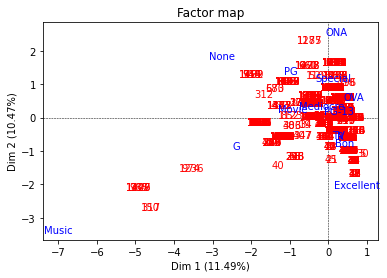

In [19]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2)

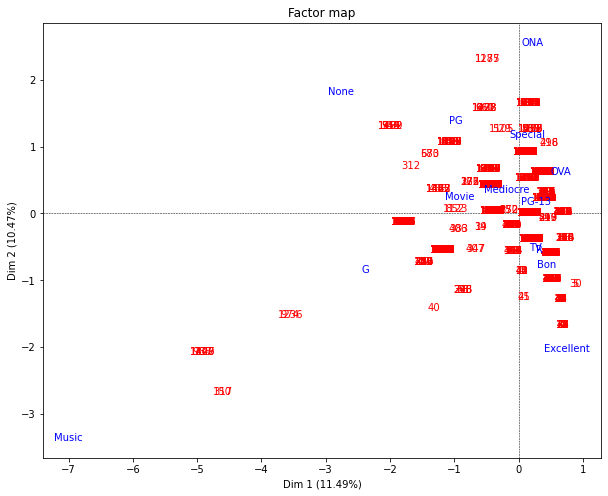

In [20]:
my_mca.mapping(1, 2, figsize=(10, 8))

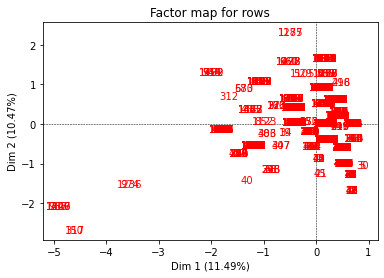

In [21]:
# Mapping des points lignes
my_mca.mapping_row(num_x_axis=1, num_y_axis=2)

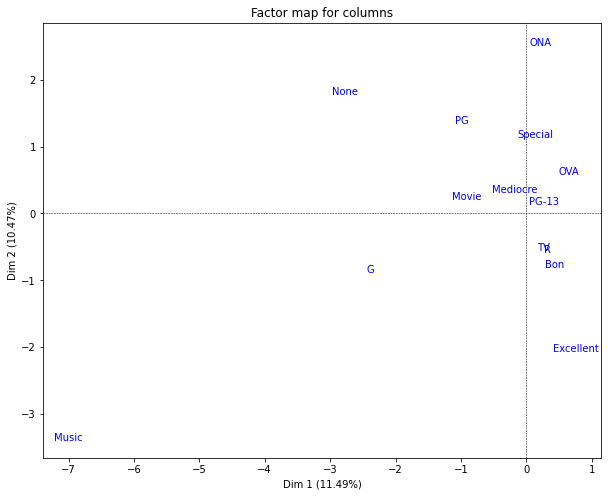

In [22]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10, 8))

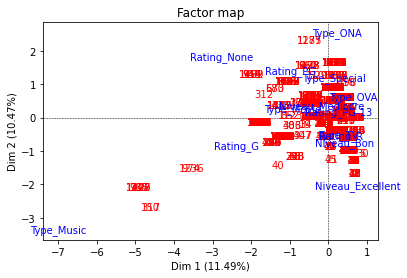

In [23]:
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)

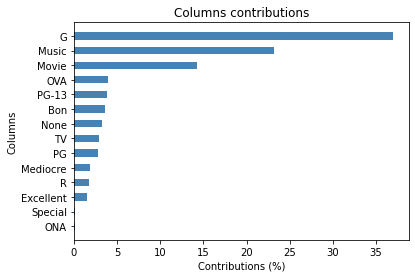

In [24]:
#Analyse du premier axe
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_contrib(num_axis=1)
#La restriction minimale, les musiques et les films contribue le plus à la formation du nuage

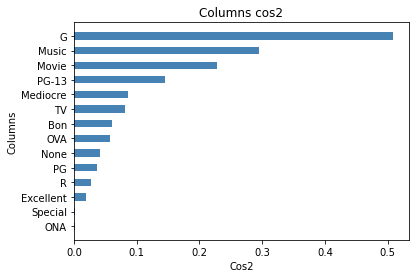

In [25]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_mca.plot_col_cos2(num_axis=1)

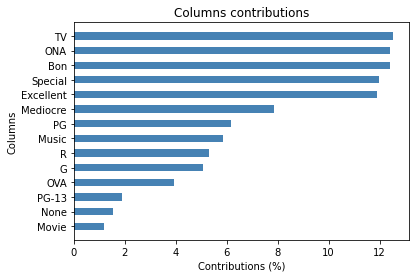

In [26]:
#Analyse du second axe
my_mca.plot_col_contrib(num_axis=2)

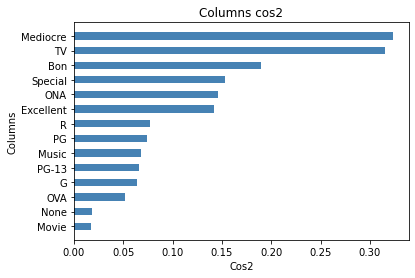

In [27]:
my_mca.plot_col_cos2(num_axis=2)
#En type : TV, special et ONA influence cet axe
#Les autres modalités qui contribuent et qui sont bien représentées 
#sont les modalités de niveau
